# Flight Passenger Segmentation for East-West Airline

## About Dataset

The file EastWestAirlines contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

The dataset includes 3999 records and 12 columns, providing a wealth of information about the flight passenger base. Each column represents a specific aspect of the passenger's profile, including their unique ID, balance, miles flew, award won etc.

By analyzing this data, businesses can gain valuable insights into their passengers' preferences, behaviors, and flying habits. For example, they can segment passengers by balance, miles flew or award won to better understand how these factors impact their flying.

## Data Dictionary

**ID**

* Numerical
* It is a unique identifier for each passenger.

**Balance**

* Numerical
* Number of miles eligible for award travel.

**Qual_mile**
* Numerical
* Number of miles counted as qualifying for Topflight status.

**cc1_miles**
* Categorical
* Number of miles earned with frequent flyer credit card in the past 12 months:
  * **1** = under 5,000
  * **2** = 5,000 - 10,000
  * **3** = 10,001 - 25,000
  * **4** = 25,001 - 50,000
  * **5** = over 50,000

**cc2_miles**
* Categorical
* Number of miles earned with Rewards credit card in the past 12 months:
  * **1** = under 5,000
  * **2** = 5,000 - 10,000
  * **3** = 10,001 - 25,000
  * **4** = 25,001 - 50,000
  * **5** = over 50,000

**cc3_miles**
* Categorical
* Number of miles earned with Small Business credit card in the past 12 months:
  * **1** = under 5,000
  * **2** = 5,000 - 10,000
  * **3** = 10,001 - 25,000
  * **4** = 25,001 - 50,000
  * **5** = over 50,000

**Bonus_miles**
* Numerical
* Number of miles earned from non-flight bonus transactions in the past 12 months by a passenger.

**Bonus_trans**
* Numerical
* Number of non-flight bonus transactions in the past 12 months by a passenger.

**Flight_miles_12mo**
* Numerical
* Number of flight miles in the past 12 months by a passenger.

**Flight_trans_12**
* Numerical
* Number of flight transactions in the past 12 months by a passenger.

**Days_since_enrolled**
* Numerical
* Number of days since enrolled in flier program by a passenger.

**Award**
* Categorical
* Whether that passenger had award flight (free flight) or not.
  * **1** = Award won
  * **0** = Award Not won


## Problem Statement

* Conduct an in-depth Exploratory Data Analysis on a dataset, uncovering insights, patterns, and relationships within the data.
* Create a profile to identify clusters(or groups) of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

## Load the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

## Reading dataset and Getting What it Contains

In [2]:
import os
folder_path = "drive/MyDrive/Colab Notebooks/dscourse/data/"
file_path = os.path.join(folder_path, "EastWestAirlines.csv")

In [3]:
df = pd.read_csv(file_path)

In [6]:
# Get 1st 5 rows
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
# Get the shape
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 3999
Number of columns: 12


#### Remove Unnecessary Columns

Removing unnecessary columns helps in reducing noise, optimizing resources and enhance quality and clarity of data.

Here ID column is not needed for EDA or modeling, so it should be removed.

In [8]:
df.drop(["ID"], axis=1, inplace=True)

In [9]:
# Sanity check
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


#### Checking Data Types
By checking datatype of each column we can identify the categorical and numerical columns present in the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [11]:
cat_columns = []
num_columns = []

for col in df.columns:
  if len(df[col].value_counts()) < 10:
    # We assume that categorical by nature as it has less than 10 unique values.
    cat_columns.append(col)
  else:
    num_columns.append(col)

print(f"Number of Categorical features: {len(cat_columns)}")
print(f"Categorical features: {cat_columns}")
print("-"* 60)
print(f"Number of Numerical features: {len(num_columns)}")
print(f"Numerical features: {num_columns}")
print("-"* 60)

Number of Categorical features: 4
Categorical features: ['cc1_miles', 'cc2_miles', 'cc3_miles', 'Award']
------------------------------------------------------------
Number of Numerical features: 7
Numerical features: ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']
------------------------------------------------------------


##### Missing Value Detection

Missing value detection is essential to chack the quality of the data. If present impute it with proper value so that quality of the data is maintained for robust statistical analysis.

In [12]:
def missing_values(df):
  missing_cols = []
  for col in df.columns:
    if df[col].isnull().sum() > 0:
      print(f"Number of Missing values in {col}: {df[col].isnull().sum()}")
      missing_cols.append(col)
  return missing_cols

In [14]:
missing_cols = missing_values(df)
if len(missing_cols) == 0:
  print(f"No missing values present in this data set.")

No missing values present in this data set.


#### Duplicate Row Detection

Detecting duplicate rows and removing them is vital for ensuring quality of data, integrity, accuracy and performance.

In [22]:
print(f"Number of duplicate rows: {df[df.duplicated()].shape[0]}")

Number of duplicate rows: 1


In [25]:
# Remove duplicate row
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows: {df[df.duplicated()].shape[0]}")

Number of duplicate rows: 0


#### Data Preparation

Scaling features ensure that all features contribute equally to the cluster formation, leading to more meaningful and accurate clusters.

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()
scaled = sc.fit_transform(df.values)

In [28]:
scaled

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

## K-Means Clustering

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Find appropriate number of clusters

Here we train the model for a range**(2-11)** clusters and using Elbow method find the best souted number of cluster for this data set.

<Axes: >

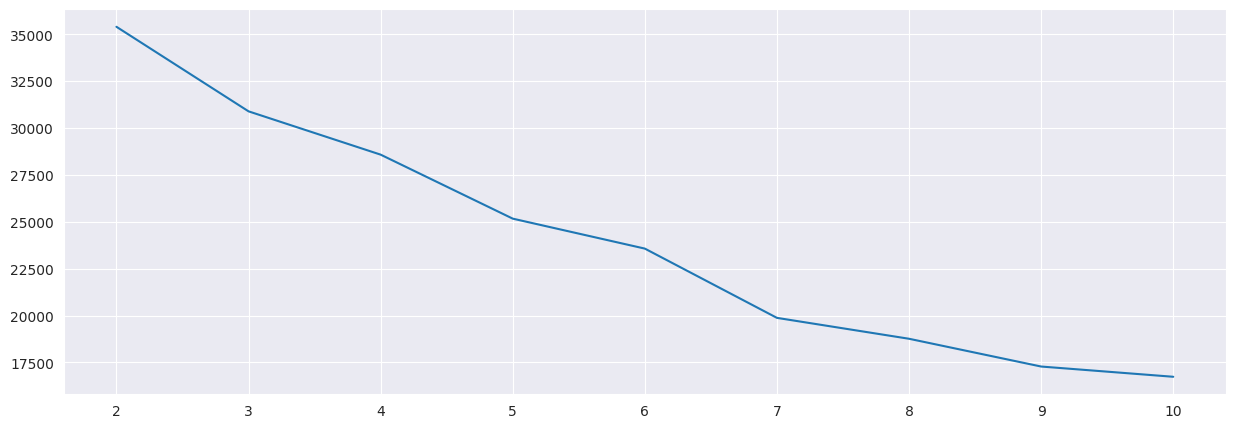

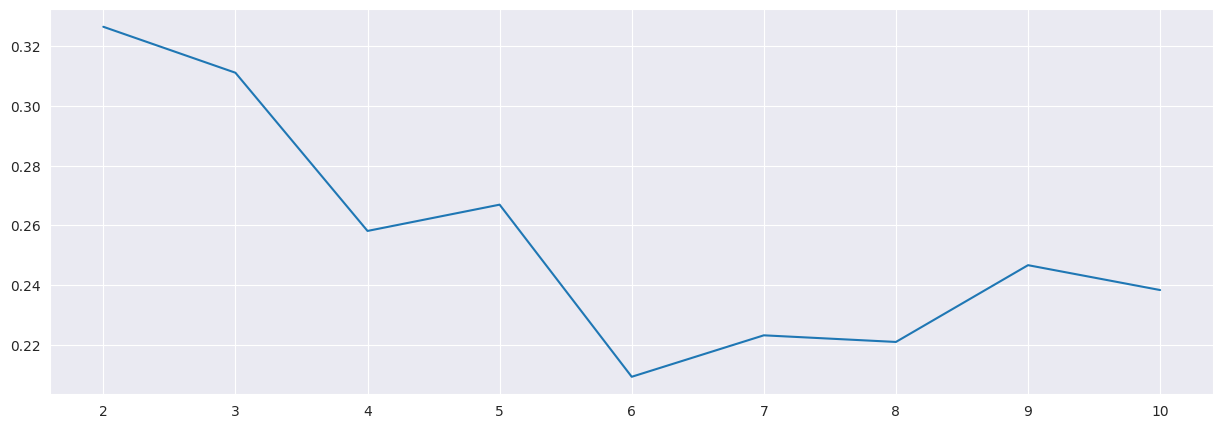

In [33]:
wcss = []
s_scores = []
clusters = range(2, 11)

for c in clusters:
  km = KMeans(n_clusters = c, random_state=42, n_init="auto")
  km.fit(scaled)
  wcss.append(km.inertia_)

  # Find Silhouette score
  ss = silhouette_score(scaled, km.labels_)
  s_scores.append(ss)

# Drow Elbow graph
plt.figure(figsize=(15, 5))
sns.lineplot(x=clusters, y= wcss)

# Drow Silhouette score
plt.figure(figsize=(15, 5))
sns.lineplot(x=clusters, y= s_scores)


### Observations

Here we can find two elbow points 3, 5, 7 and 9. We use 3 as sihouette score is highest among 4 elbow points.

In [34]:
km = KMeans(n_clusters= 3, random_state=42, n_init="auto")
km.fit(scaled)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [35]:
df["cluster"] = km.labels_

In [36]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [37]:
df["cluster"].value_counts().sort_index()

cluster
0    1259
1     166
2    2573
Name: count, dtype: int64

## Visualize Clusters

In [39]:
input_x= df.iloc[:, :-1].values
output_y = df.iloc[:, -1].values

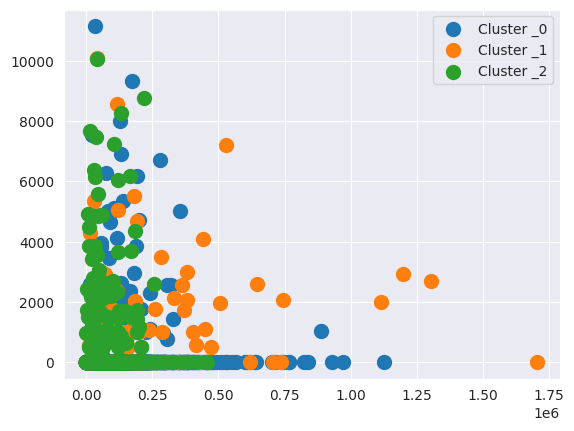

In [42]:
for i in sorted(df["cluster"].unique()):
  plt.scatter(input_x[output_y == i, 0],input_x[output_y == i, 1], s= 100, label="Cluster _" + str(i))
plt.legend()

## Analyzing characteristics of the identified clusters

#### Plot Categorical Features with each Cluster

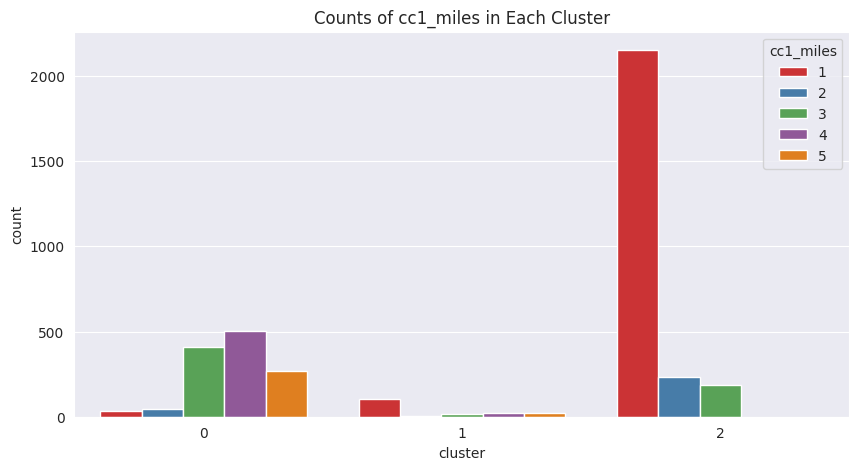

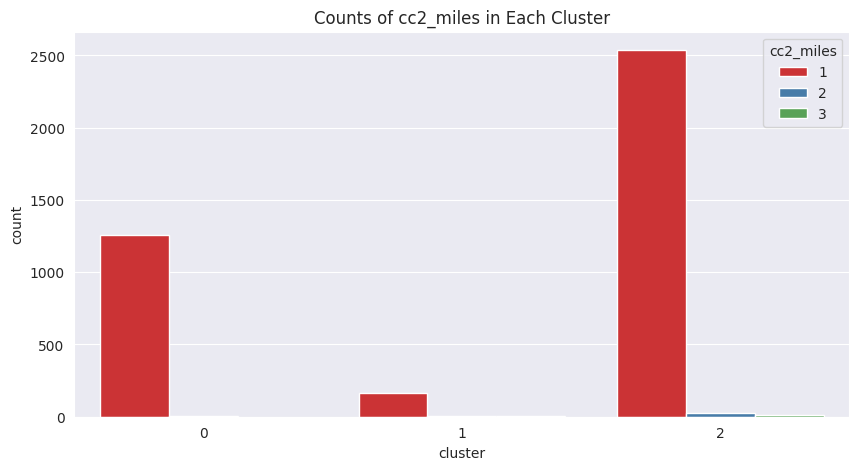

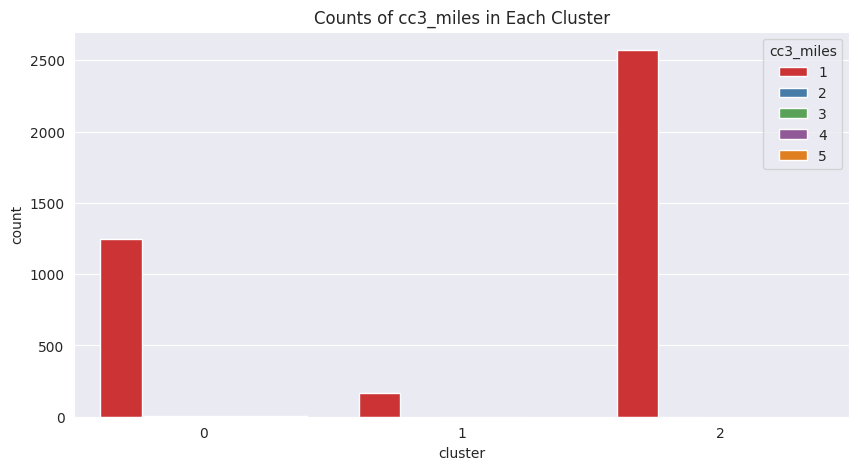

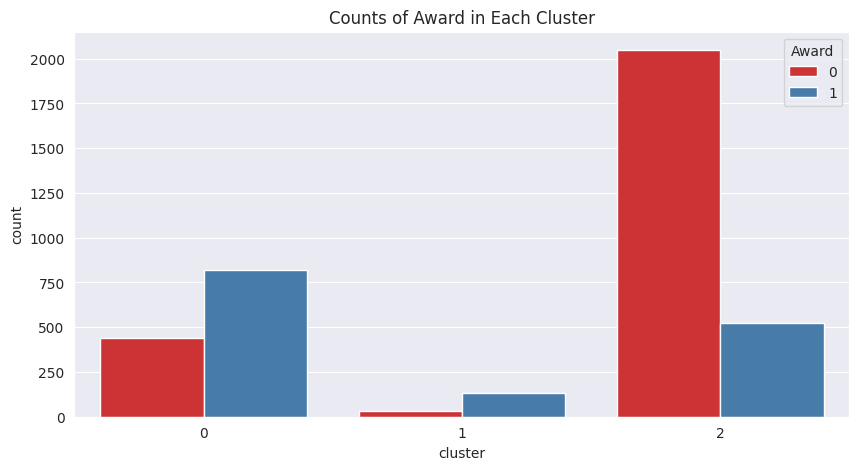

In [43]:
for col in cat_columns:
  plt.figure(figsize=(10, 5))
  sns.countplot(data=df,
                x="cluster",
                hue=col,
                order=sorted(df["cluster"].unique()),
                palette="Set1")
  plt.title(f"Counts of {col} in Each Cluster")

### Analyzing Numerical features for each cluster

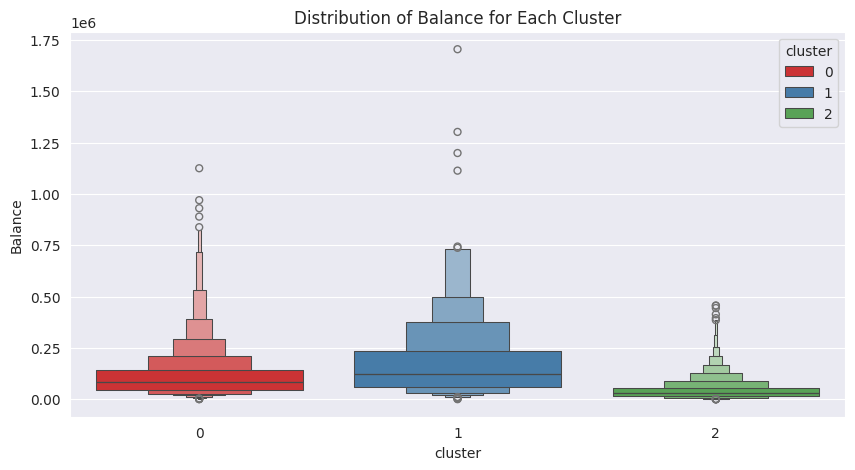

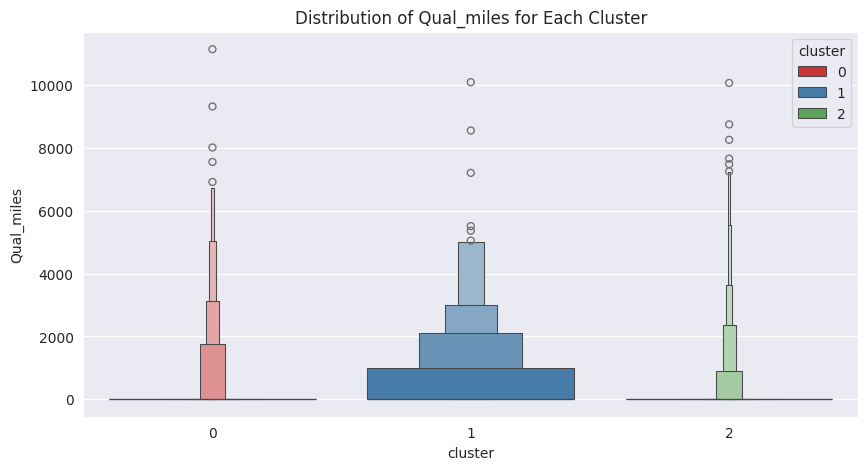

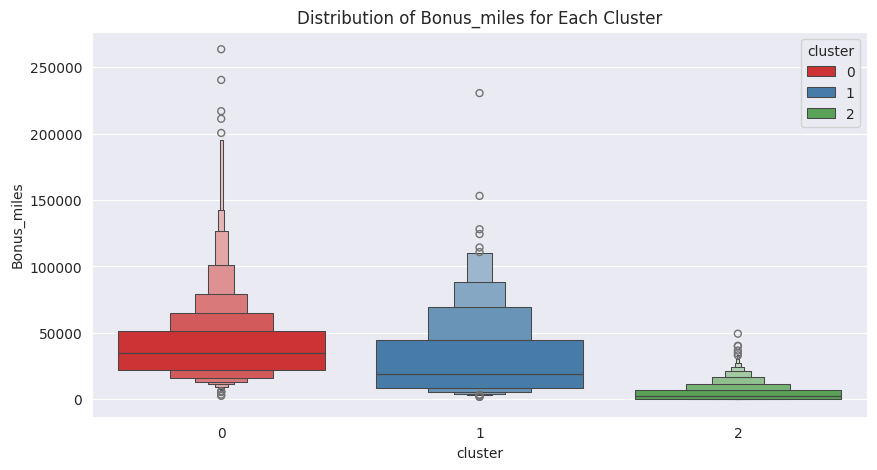

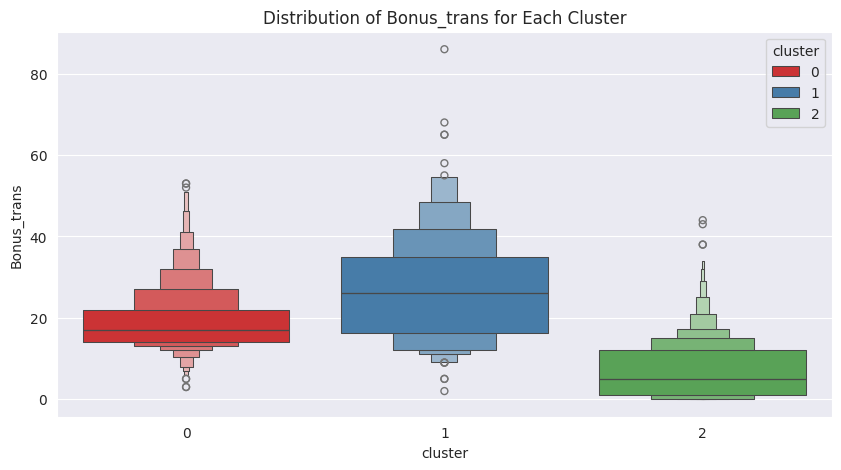

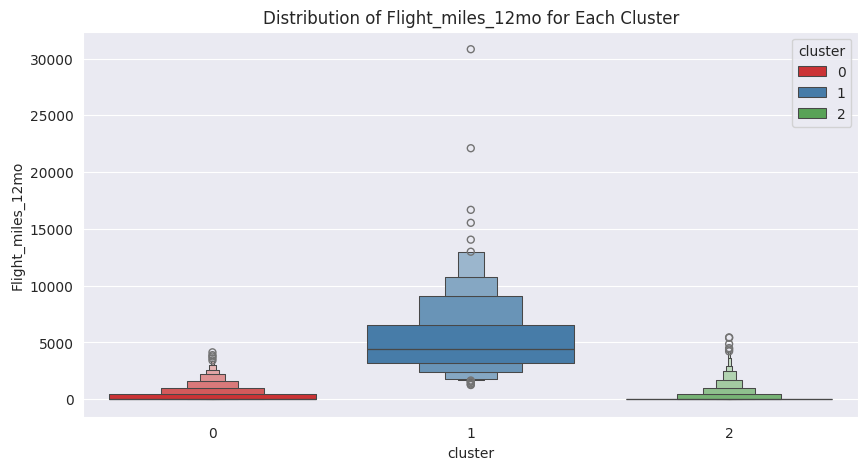

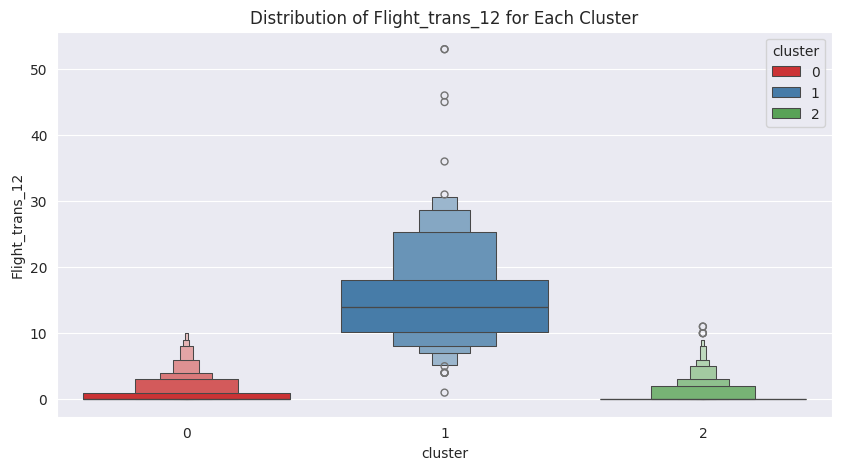

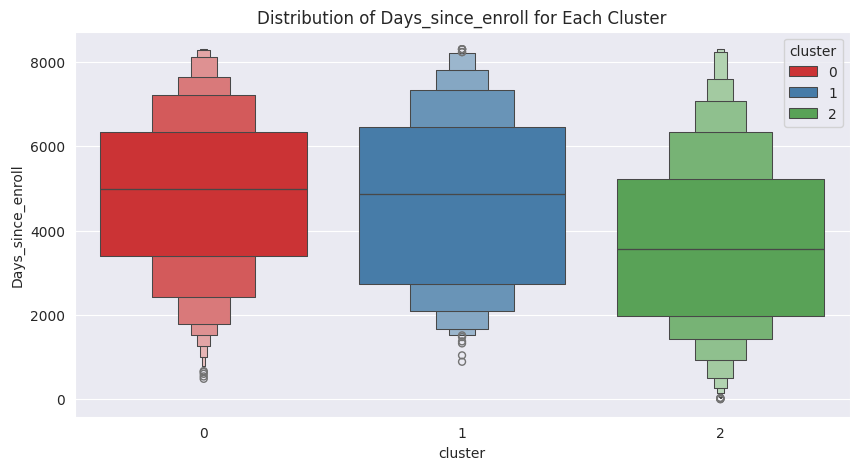

In [44]:
for col in num_columns:
  plt.figure(figsize=(10, 5))
  sns.boxenplot(data= df,
                x="cluster",
                y=col,
                hue="cluster",
                order=sorted(df["cluster"].unique()),
                palette="Set1")
  plt.title(f"Distribution of {col} for Each Cluster")

## Conclutions

* Analyzing the scatter plot for each cluster we can say that all clusters are overlapped.
* Analyzing categorical features for each cluster we found that:
  * Number of miles earned with Rewards credit card in the past 12 months has no impact in clustering.
  * Number of miles earned with Small Business credit card in the past 12 months  has no impact in clustering.
  *  Number of miles earned with Small Business credit card in the past 12 months has no impact in clustering.

**Cluster 0**
* Number of miles earned with frequent flyer credit card in the past 12 months is above 10000.
* Mixed in tearms of award woned. Lean towards woned.
* Balance Higher range.
* Number of miles counted as qualifying for Topflight status is lower.
* Number of miles earned from non-flight bonus transactions in the past 12 months is slightly higher.
* Number of non-flight bonus transactions in the past 12 months is medium.
* Number of flight miles in the past 12 months is lower.
* Number of flight transactions in the past 12 months in lower.
* Number of days since enrolled in flier program  is higher.


**Cluster 1**
* Number of miles earned with frequent flyer credit card in the past 12 months has all categories.
* Mixed in tearms of award woned. Lean towards woned.
* Balance Medium range.
* Number of miles counted as qualifying for Topflight status is higher.
* Number of miles earned from non-flight bonus transactions in the past 12 months is medium.
* Number of non-flight bonus transactions in the past 12 months is higher.
* Number of flight miles in the past 12 months is higher.
* Number of flight transactions in the past 12 months in higher.
* Number of days since enrolled in flier program  is higher.

**Cluster 2**
* Number of miles earned with frequent flyer credit card in the past 12 months is below 5000
* Mixed in tearms of award woned. Lean towards not woned.
* Balance lower range.
* Number of miles counted as qualifying for Topflight status is lower.
* Number of miles earned from non-flight bonus transactions in the past 12 months is slightly lower.
* Number of non-flight bonus transactions in the past 12 months is lower.
* Number of flight miles in the past 12 months is lower.
* Number of flight transactions in the past 12 months in lower.
* Number of days since enrolled in flier program  is lower.



**Due to presence of outliers all clusters are overlapping with each other. Although using the above mentioned features we can segment the passengers of based on flying habits.**
